<a href="https://colab.research.google.com/github/cirilwakounig/AlgorithmicTrading/blob/main/1_DCGC_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Death-Cross-Golden-Cross Strategy / DCGC-Strategy
# https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp
# Description: This programme uses the dual moving average crossover to determine when to buy and sell stocks.
# Golden Cross vs. Death Cross Strategy

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data by selecting a file on your local machine
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [4]:
# Store the data and select the first row until the row 'end_date'
AAPL_data = pd.read_csv('AAPL.csv')
end_date = "2011-12-30"
# Return the index of the end date
end_index = AAPL_data.index[AAPL_data["Date"]==end_date].tolist()[0]    # 0 in brackets selects the first element in the list
end_index += 1    # Python Indexing Starts at 0, so the last index needs to be increased by one to get to the correct row
AAPL = AAPL_data.iloc[1:end_index,:]
# Show the data 
AAPL


,Date,Open,High,Low,Close,Adj Close,Volume
1,2006-10-03,2.658929,2.676786,2.613929,2.645714,2.282328,790708800
2,2006-10-04,2.646429,2.695000,2.612857,2.692143,2.322379,829082800
3,2006-10-05,2.661786,2.720000,2.647500,2.672500,2.305435,683883200
4,2006-10-06,2.657857,2.680000,2.636071,2.650714,2.286641,466958800
5,2006-10-09,2.635714,2.681429,2.626071,2.665357,2.299273,438222400
...,...,...,...,...,...,...,...
1318,2011-12-23,14.274643,14.413929,14.267500,14.404643,12.426182,269399200
1319,2011-12-27,14.396428,14.610357,14.393572,14.518929,12.524765,265076000
1320,2011-12-28,14.531786,14.580358,14.333571,14.380000,12.404922,228662000
1321,2011-12-29,14.407143,14.487500,14.303928,14.468572,12.481326,215978000


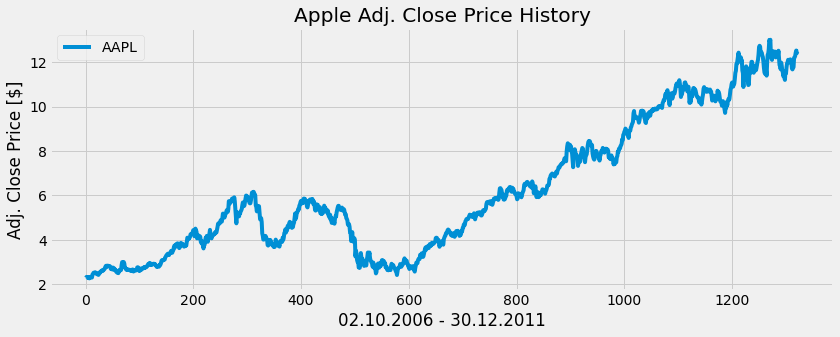

In [5]:
# Visualise the Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL["Adj Close"], label = "AAPL")
plt.title("Apple Adj. Close Price History")
plt.xlabel("02.10.2006 - 30.12.2011")
plt.ylabel("Adj. Close Price [$]")
plt.legend(loc = "upper left")
plt.show()

In [6]:
# Create Simple Moving Average (SMA) with a 30 day window
SMA30 = pd.DataFrame()
SMA30["Adj Close"] = AAPL["Adj Close"].rolling(window = 30).mean()


In [7]:
# Create Simple Moving Average (SMA) with a 100 day window
SMA100 = pd.DataFrame()
SMA100["Adj Close"] = AAPL["Adj Close"].rolling(window = 100).mean()
SMA100

,Adj Close
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
1318,11.949215
1319,11.958199
1320,11.967140
1321,11.983133


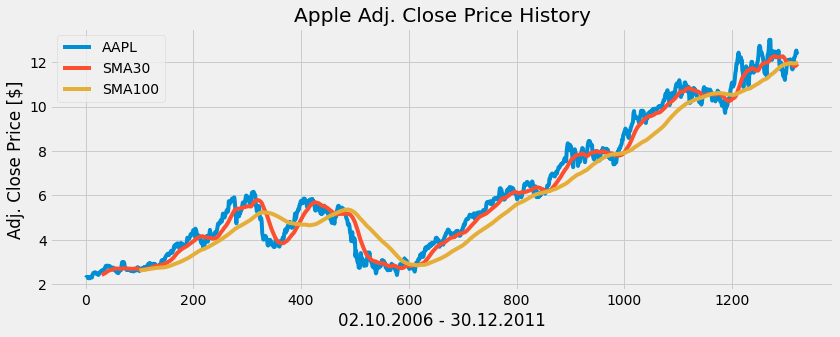

In [8]:
# Visualise the Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL["Adj Close"], label = "AAPL")
plt.plot(SMA30, label = "SMA30")
plt.plot(SMA100, label = "SMA100")
plt.title("Apple Adj. Close Price History")
plt.xlabel("02.10.2006 - 30.12.2011")
plt.ylabel("Adj. Close Price [$]")
plt.legend(loc = "upper left")
plt.show()

In [9]:
# Create a new data frame to store all the data 
data = pd.DataFrame()
data["AAPL"] = AAPL["Adj Close"]
data["SMA30"] = SMA30
data["SMA100"] = SMA100
data


,AAPL,SMA30,SMA100
1,2.282328,NaN,NaN
2,2.322379,NaN,NaN
3,2.305435,NaN,NaN
4,2.286641,NaN,NaN
5,2.299273,NaN,NaN
...,...,...,...
1318,12.426182,11.840582,11.949215
1319,12.524765,11.863083,11.958199
1320,12.404922,11.887094,11.967140
1321,12.481326,11.903823,11.983133


In [10]:
# Create a function to signal when to buy and sell
def buy_sell(data):
  sigPricebuy = []
  sigPricesell = []
  flag = -1     # Flags, when the two moving averages have crossed

  for i in range(len(data)):
    
    # Returns a signal for buy when SMA30 is greater than SMA100 for the first time and thus crosses from the bottom
    # If the flag is 1, then this value is not the first time, that SMA30 is greater than SMA100 and therefore not a price signal
    if data["SMA30"].iloc[i] > data["SMA100"].iloc[i]:
      if flag != 1:
        sigPricebuy.append(data["AAPL"].iloc[i])
        sigPricesell.append(np.nan)
        flag = 1
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    # Returns a signal for sell when SMA30 is smaller than SMA100 for the first time and thus crosses from the top
    # If the flag is 0, then this value is not the first time, that SMA30 is smaller than SMA100 and therefore not a price signal
    elif data["SMA30"].iloc[i] < data["SMA100"].iloc[i]:
      if flag != 0:
        sigPricebuy.append(np.nan)
        sigPricesell.append(data["AAPL"].iloc[i])
        flag = 0
      else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)
    else:
        sigPricebuy.append(np.nan)
        sigPricesell.append(np.nan)

  return (sigPricebuy, sigPricesell)


In [11]:
# Store the buy and sell data into a variable
buySell = buy_sell(data)
data["Buy_Signal_Price"] = buySell[0]
data["Sell_Signal_Price"] = buySell[1]

In [12]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
1,2.282328,NaN,NaN,NaN,NaN
2,2.322379,NaN,NaN,NaN,NaN
3,2.305435,NaN,NaN,NaN,NaN
4,2.286641,NaN,NaN,NaN,NaN
5,2.299273,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1318,12.426182,11.840582,11.949215,NaN,NaN
1319,12.524765,11.863083,11.958199,NaN,NaN
1320,12.404922,11.887094,11.967140,NaN,NaN
1321,12.481326,11.903823,11.983133,NaN,NaN


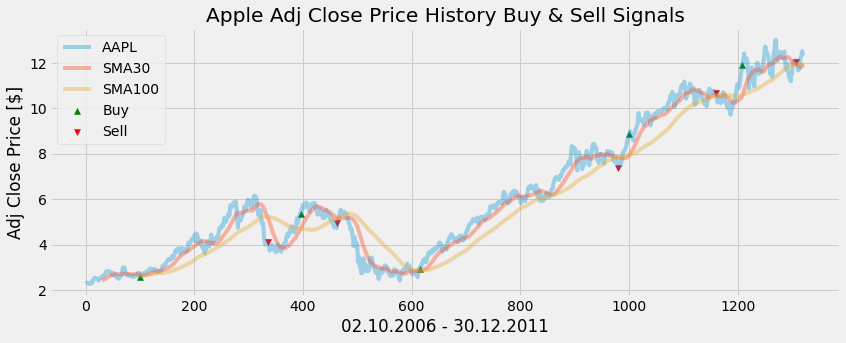

In [13]:
# Visualise Data and Strategy
plt.figure(figsize = (12.6, 4.6))
plt.plot(data["AAPL"], label = "AAPL", alpha = 0.35)
plt.plot(data["SMA30"], label = "SMA30", alpha = 0.40)
plt.plot(data["SMA100"], label = "SMA100", alpha = 0.40)
plt.scatter(data.index, data["Buy_Signal_Price"], label = "Buy", marker = "^", color = "green")
plt.scatter(data.index, data["Sell_Signal_Price"], label = "Sell", marker = "v", color = "red")
plt.title('Apple Adj Close Price History Buy & Sell Signals')
plt.xlabel('02.10.2006 - 30.12.2011')
plt.ylabel('Adj Close Price [$]')
plt.legend(loc = "upper left")
plt.show()

In [14]:
# Determine Indices of Trade Activities - Check that a buying index is before the first selling index!
# First block of code using lists
buy_indices = data.index[data["Buy_Signal_Price"].notnull()].tolist()
sell_indices = data.index[data["Sell_Signal_Price"].notnull()].tolist()

# Second block of code using data frames
#buy_indices = pd.DataFrame(data.index[data["Buy_Signal_Price"].notnull()])
#sell_indices = pd.DataFrame(data.index[data["Sell_Signal_Price"].notnull()])
#trade_info = pd.concat([buy_indices,sell_indices], axis = 1)
#trade_info.columns = ["buy_indices", "sell_indices"]

In [15]:
# Determine Buy and Sell Prices based on Trade Activity Indices
buy_prices = pd.DataFrame(data["AAPL"].iloc[buy_indices].reset_index(drop = True))
sell_prices = pd.DataFrame(data["AAPL"].iloc[sell_indices].reset_index(drop = True))
prices = pd.concat([buy_prices,sell_prices], axis = 1)
prices.columns = ["buy_price", "sell_price"]

In [16]:
# Simplified Profit Calculation for the assumption of a constant number of traded shares
numShares = 1
prices["profit"] = prices["sell_price"] - prices["buy_price"]

# Revenues, Costs and Profits per Share
Costs = sum(prices["profit"])*numShares
Revenues = sum(prices["sell_price"])*numShares
Profits = sum(prices["profit"])*numShares

In [17]:
# Print the result
print('The DCGC-Strategy with a simplified profit calculation yields a profit of',Profits,'$ per Share in the analysed period.')

The DCGC-Strategy with a simplified profit calculation yields a profit of 6.97392 $ per Share in the analysed period.
